# Demand Forecasting & Inventory Optimization for DataCo Global

## Notebook 01: Data Cleaning & Validation

---

**Project:** End-to-End Supply Chain Analytics  
**Dataset:** DataCo Smart Supply Chain Dataset (180,519 orders)  

---

### Notebook Series

| Notebook | Description | Status |
|----------|-------------|--------|
| **01_Data_Cleaning** | Data loading, cleaning, and validation | Current |
| 02_EDA_ABC_XYZ | Exploratory analysis and product segmentation | Next |
| 03_Forecasting_Models | Demand forecasting model development | Pending |
| 04_Inventory_Optimization | Safety stock and reorder point calculation | Pending |

---

### Objectives

1. Load and inspect the raw dataset
2. Remove irrelevant columns
3. Convert data types
4. Filter to valid, fulfilled orders only
5. Validate data quality through visualization
6. Export cleaned data for analysis

### Table of Contents

1. [Setup & Data Loading](#1-setup--data-loading)
2. [Initial Inspection](#2-initial-inspection)
3. [Column Selection](#3-column-selection)
4. [Data Type Conversion](#4-data-type-conversion)
5. [Data Validation](#5-data-validation)
6. [Export Cleaned Data](#6-export-cleaned-data)

---

## 1. Setup & Data Loading

In [1]:
import pandas as pd 
import numpy as np 

df = pd.read_csv("DataCoSupplyChainDataset.csv",
    encoding="utf-8",
    encoding_errors="ignore"
)

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

Dataset shape: (180519, 53)

Columns: ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Pro

## 2. Initial Inspection

In [2]:
# Check Duplicate rows 
duplicate_rows = df.duplicated().sum()
print(f"\n Exact duplicate rows: {duplicate_rows}")


 Exact duplicate rows: 0


## 3. Column Selection

The original dataset contains 53 columns. We retain only columns relevant for demand forecasting and inventory optimization.

In [3]:
# Columns to drop
columns_to_drop = [
    'Type',
    'Benefit per order',
    'Sales per customer',
    'Category Id',
    'Customer City',
    'Customer Country',
    'Customer Email',
    'Customer Fname',
    'Customer Id',
    'Customer Lname',
    'Customer Password',
    'Customer State',
    'Customer Street',
    'Customer Zipcode',
    'Department Id',
    'Department Name',
    'Latitude',
    'Longitude',
    'Order Customer Id',
    'Order Item Cardprod Id',
    'Order Item Discount',
    'Order Item Id',
    'Order Item Product Price',
    'Order Item Profit Ratio',
    'Order Region',
    'Order State',
    'Order Zipcode',
    'Product Category Id',
    'Product Description',
    'Product Image',
    'shipping date (DateOrders)'
]

# Drop columns
df_clean = df.drop(columns=columns_to_drop, errors='ignore')

# Verify results
print(f"Original shape: {df.shape}")
print(f"Clean shape: {df_clean.shape}")
print(f"Columns after dropping: {df_clean.columns.tolist()}")

Original shape: (180519, 53)
Clean shape: (180519, 22)
Columns after dropping: ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer Segment', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id', 'Order Item Discount Rate', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Status', 'Product Card Id', 'Product Name', 'Product Price', 'Product Status', 'Shipping Mode']


In [4]:
# Check Data Types 

df_clean.dtypes

Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Delivery Status                   object
Late_delivery_risk                 int64
Category Name                     object
Customer Segment                  object
Market                            object
Order City                        object
Order Country                     object
order date (DateOrders)           object
Order Id                           int64
Order Item Discount Rate         float64
Order Item Quantity                int64
Sales                            float64
Order Item Total                 float64
Order Profit Per Order           float64
Order Status                      object
Product Card Id                    int64
Product Name                      object
Product Price                    float64
Product Status                     int64
Shipping Mode                     object
dtype: object

## 4. Data Type Conversion

In [5]:
# Convert order date to datetime 

# Check what the date looks like currently
print(df_clean['order date (DateOrders)'].head(10))

0    1/31/2018 22:56
1    1/13/2018 12:27
2    1/13/2018 12:06
3    1/13/2018 11:45
4    1/13/2018 11:24
5    1/13/2018 11:03
6    1/13/2018 10:42
7    1/13/2018 10:21
8    1/13/2018 10:00
9     1/13/2018 9:39
Name: order date (DateOrders), dtype: object


In [6]:
# Convert order date to datetime
df_clean['order date (DateOrders)'] = pd.to_datetime(
    df_clean['order date (DateOrders)'], 
    format='%m/%d/%Y %H:%M'
)

# Verify conversion
print("Data type after conversion:")
print(df_clean['order date (DateOrders)'].dtype)

print("\nSample values (after conversion):")
print(df_clean['order date (DateOrders)'].head())

print("\nDate range in dataset:")
print(f"Start: {df_clean['order date (DateOrders)'].min()}")
print(f"End: {df_clean['order date (DateOrders)'].max()}")

Data type after conversion:
datetime64[ns]

Sample values (after conversion):
0   2018-01-31 22:56:00
1   2018-01-13 12:27:00
2   2018-01-13 12:06:00
3   2018-01-13 11:45:00
4   2018-01-13 11:24:00
Name: order date (DateOrders), dtype: datetime64[ns]

Date range in dataset:
Start: 2015-01-01 00:00:00
End: 2018-01-31 23:38:00


In [7]:
# Check missing values 

df_clean.isnull().sum()

Days for shipping (real)         0
Days for shipment (scheduled)    0
Delivery Status                  0
Late_delivery_risk               0
Category Name                    0
Customer Segment                 0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Item Discount Rate         0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Order Status                     0
Product Card Id                  0
Product Name                     0
Product Price                    0
Product Status                   0
Shipping Mode                    0
dtype: int64

## 5. Data Validation

**Validation Checklist:**
- Order Status: Identify valid vs invalid orders
- Lead Time: Check for outliers
- Order Quantity: Verify target variable integrity
- Delivery Status: Establish service level baseline

### 5.1 Order Status Analysis

/var/folders/fz/fn63jcks2kx_4ngyvls8mp0w0000gn/T/ipykernel_86438/1291965091.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')


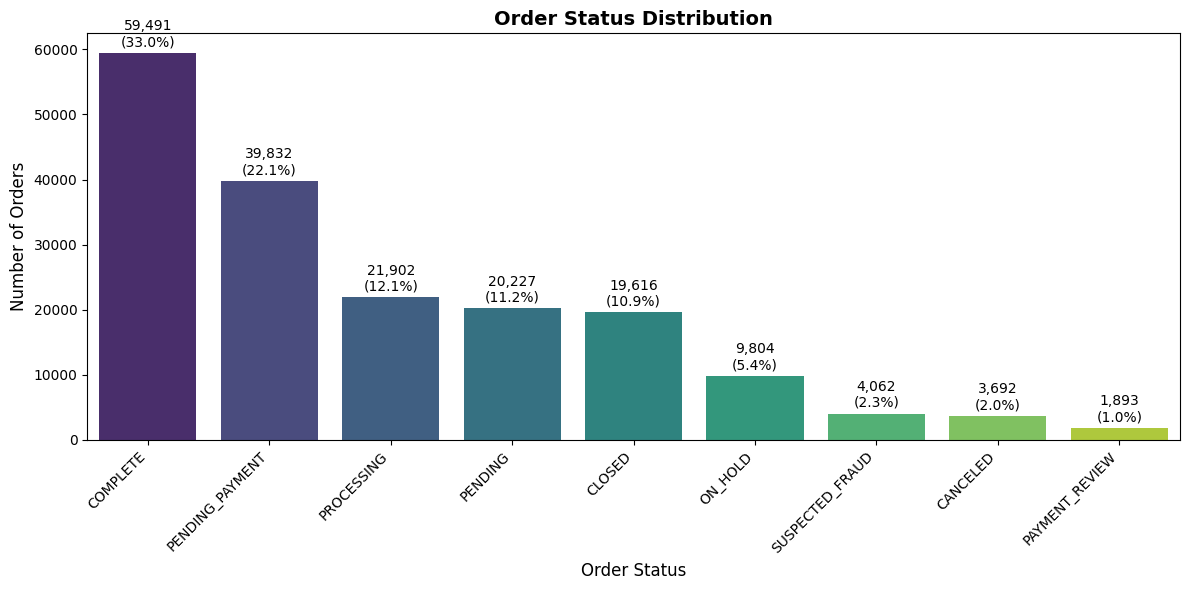


Summary:
Total Orders: 180,519

Breakdown:
  COMPLETE: 59,491 (33.0%)
  PENDING_PAYMENT: 39,832 (22.1%)
  PROCESSING: 21,902 (12.1%)
  PENDING: 20,227 (11.2%)
  CLOSED: 19,616 (10.9%)
  ON_HOLD: 9,804 (5.4%)
  SUSPECTED_FRAUD: 4,062 (2.3%)
  CANCELED: 3,692 (2.0%)
  PAYMENT_REVIEW: 1,893 (1.0%)


In [8]:
# 1. Order Status 

import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Count orders by status
status_counts = df_clean['Order Status'].value_counts()

# Create bar chart
ax = sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')

# Add value labels on bars
for i, v in enumerate(status_counts.values):
    percentage = (v / len(df_clean) * 100)
    ax.text(i, v + 1000, f'{v:,}\n({percentage:.1f}%)', ha='center', fontsize=10)

# Formatting
plt.title('Order Status Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Print summary
print("\nSummary:")
print("=" * 40)
print(f"Total Orders: {len(df_clean):,}")
print(f"\nBreakdown:")
for status, count in status_counts.items():
    pct = count / len(df_clean) * 100
    print(f"  {status}: {count:,} ({pct:.1f}%)")

In [9]:
# Investigate CLOSED status
print("Investigating CLOSED orders:")
print("=" * 50)

# Compare CLOSED vs COMPLETE on key metrics
comparison = df_clean.groupby('Order Status').agg({
    'Days for shipping (real)': ['mean', 'median'],
    'Late_delivery_risk': 'mean',
    'Sales': 'mean'
}).round(2)

# Filter to show only COMPLETE and CLOSED
print(comparison.loc[['COMPLETE', 'CLOSED']])

# Check Delivery Status distribution for CLOSED orders
print("\n\nDelivery Status for CLOSED orders:")
print(df_clean[df_clean['Order Status'] == 'CLOSED']['Delivery Status'].value_counts())

print("\n\nDelivery Status for COMPLETE orders:")
print(df_clean[df_clean['Order Status'] == 'COMPLETE']['Delivery Status'].value_counts())

Investigating CLOSED orders:
             Days for shipping (real)        Late_delivery_risk   Sales
                                 mean median               mean    mean
Order Status                                                           
COMPLETE                         3.49    3.0               0.57  203.31
CLOSED                           3.47    3.0               0.57  205.07


Delivery Status for CLOSED orders:
Delivery Status
Late delivery       11109
Advance shipping     4809
Shipping on time     3698
Name: count, dtype: int64


Delivery Status for COMPLETE orders:
Delivery Status
Late delivery       34199
Advance shipping    14136
Shipping on time    11156
Name: count, dtype: int64


**Order Status Investigation: CLOSED vs COMPLETE**

**Findings:** CLOSED orders match COMPLETE orders exactly: same lead time (~3.5 days), same late delivery rate (57%), similar average sales (~$204).

**Conclusion:** CLOSED orders were fulfilled and then marked "closed" in the system.

**Decision:** Keep COMPLETE and CLOSED (79,107 orders). Remove all other statuses:

| Status Removed | Reasoning |
|----------------|-----------|
| PENDING_PAYMENT | Payment not confirmed |
| PROCESSING | Still in progress |
| PENDING | Not started |
| ON_HOLD | Paused orders |
| SUSPECTED_FRAUD | Fake orders |
| CANCELED | Not fulfilled |
| PAYMENT_REVIEW | Under review |

In [10]:
# Filter to keep only COMPLETE and CLOSED orders
df_clean = df_clean[df_clean['Order Status'].isin(['COMPLETE', 'CLOSED'])]
print(df_clean['Order Status'].value_counts())

Order Status
COMPLETE    59491
CLOSED      19616
Name: count, dtype: int64


### 5.2 Lead Time Analysis

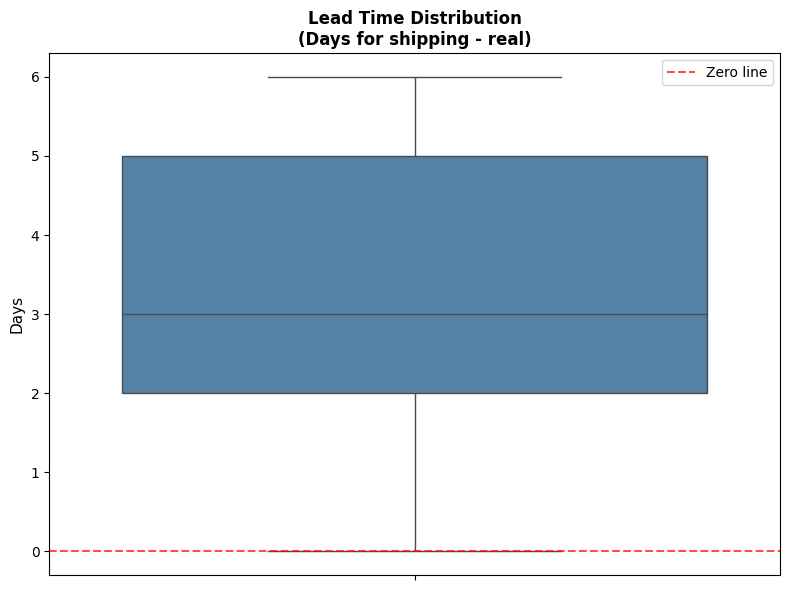

count    79107.000000
mean         3.483674
std          1.617102
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: Days for shipping (real), dtype: float64

Outlier Check:
  Negative values (< 0):     0
  Zero values (= 0):         2,220
  High values (> 10 days):   0


In [11]:
# Visualization 2: Lead Time Box Plot

plt.figure(figsize=(8, 6))

sns.boxplot(y=df_clean['Days for shipping (real)'], color='steelblue')
plt.title('Lead Time Distribution\n(Days for shipping - real)', fontsize=12, fontweight='bold')
plt.ylabel('Days', fontsize=11)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Zero line')
plt.legend()

plt.tight_layout()
plt.show()

# Statistics
lead_time = df_clean['Days for shipping (real)']
print(lead_time.describe())

print("\nOutlier Check:")
print(f"  Negative values (< 0):     {(lead_time < 0).sum():,}")
print(f"  Zero values (= 0):         {(lead_time == 0).sum():,}")
print(f"  High values (> 10 days):   {(lead_time > 10).sum():,}")

**Lead Time Analysis Results**

- **Distribution:** 0-6 days, Mean = 3.48, Std Dev = 1.62
- **Data Quality:** No negative values, no extreme outliers
- **Conclusion:** Lead time data is clean. Key parameters: LT = 3.48 days, σ_LT = 1.62 days

### 5.3 Order Item Quantity Analysis

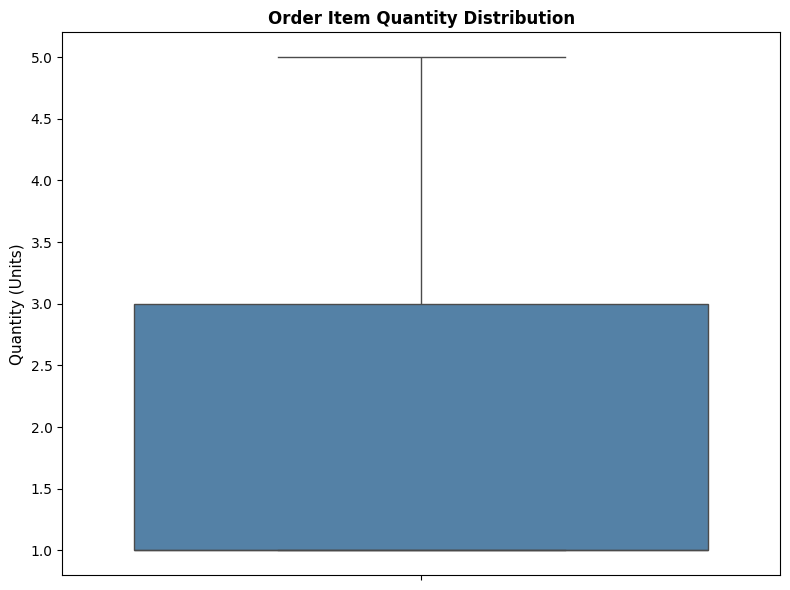

count    79107.000000
mean         2.124742
std          1.452459
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          5.000000
Name: Order Item Quantity, dtype: float64

Value Counts:
Order Item Quantity
1    43527
2     8877
3     8916
4     8882
5     8905
Name: count, dtype: int64


In [12]:
# Visualization 3: Order Item Quantity Box Plot

plt.figure(figsize=(8, 6))

sns.boxplot(y=df_clean['Order Item Quantity'], color='steelblue')
plt.title('Order Item Quantity Distribution', fontsize=12, fontweight='bold')
plt.ylabel('Quantity (Units)', fontsize=11)

plt.tight_layout()
plt.show()

# Statistics
quantity = df_clean['Order Item Quantity']
print(quantity.describe())

print("\nValue Counts:")
print(quantity.value_counts().sort_index())

In [13]:
# Skewness Check
print(f"Skewness: {quantity.skew():.2f}")

Skewness: 0.88


**Order Item Quantity Analysis**

- **Distribution:** Range 1-5 units, Mean = 2.12, Median = 1
- **Skewness:** Right-skewed (typical for retail)
- **Conclusion:** Data is clean, no outlier treatment needed

### 5.4 Delivery Status (Service Level Baseline)

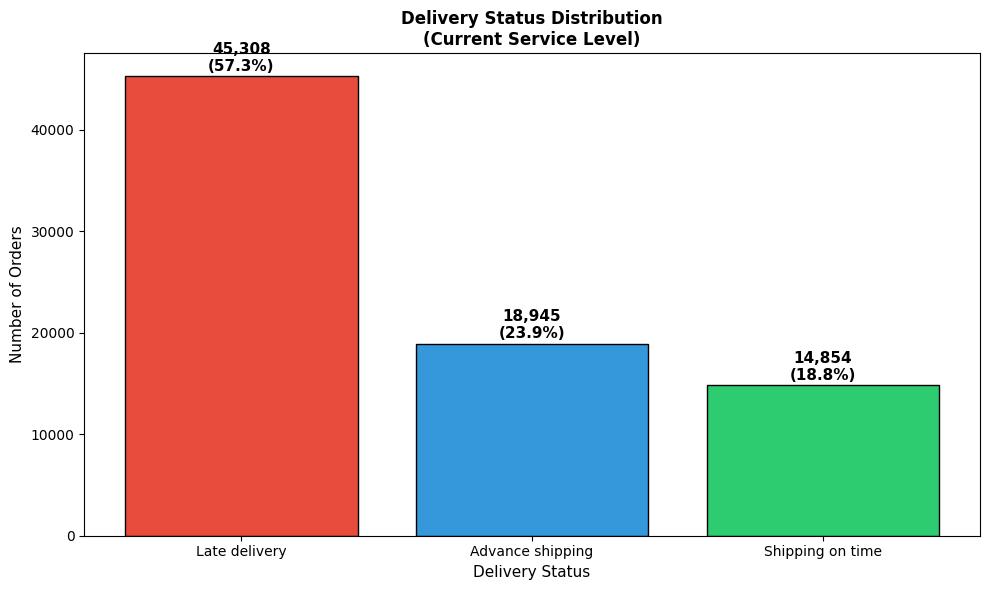


Delivery Status Summary:
  Late delivery: 45,308 (57.3%)
  Advance shipping: 18,945 (23.9%)
  Shipping on time: 14,854 (18.8%)

  Total Orders: 79,107

Current On-Time Rate: 42.7%


In [14]:
# Visualization 5: Delivery Status Distribution

plt.figure(figsize=(10, 6))

# Count by delivery status
status_counts = df_clean['Delivery Status'].value_counts()

# Create bar chart
bars = plt.bar(status_counts.index, status_counts.values, color=['#e74c3c', '#3498db', '#2ecc71'], edgecolor='black')

# Add percentage labels
total = len(df_clean)
for bar, count in zip(bars, status_counts.values):
    pct = count / total * 100
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, 
             f'{count:,}\n({pct:.1f}%)', ha='center', fontsize=11, fontweight='bold')

plt.title('Delivery Status Distribution\n(Current Service Level)', fontsize=12, fontweight='bold')
plt.xlabel('Delivery Status', fontsize=11)
plt.ylabel('Number of Orders', fontsize=11)

plt.tight_layout()
plt.show()

# Summary
print("\nDelivery Status Summary:")
print("=" * 50)
for status, count in status_counts.items():
    pct = count / total * 100
    print(f"  {status}: {count:,} ({pct:.1f}%)")

print(f"\n  Total Orders: {total:,}")
print(f"\nCurrent On-Time Rate: {(df_clean['Delivery Status'] != 'Late delivery').mean()*100:.1f}%")

**Delivery Status Analysis: Problem Statement Baseline**

**Current Performance:** 57.3% late deliveries = only 42.7% on-time rate (vs 90-95% industry standard)

**Business Impact:** Poor customer experience, complaints, and churn

**Project Justification:** Demand forecasting + inventory optimization will improve service levels to 95-98%

## 6. Export Cleaned Data

In [15]:
# Create output directories
import os
os.makedirs('data/processed', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

# Save cleaned data
df_clean.to_csv('data/processed/df_clean.csv', index=False)

print("Data exported successfully!")
print(f"\nFile: data/processed/df_clean.csv")
print(f"Records: {len(df_clean):,}")
print(f"Columns: {len(df_clean.columns)}")
print(f"Date Range: {df_clean['order date (DateOrders)'].min().date()} to {df_clean['order date (DateOrders)'].max().date()}")

Data exported successfully!

File: data/processed/df_clean.csv
Records: 79,107
Columns: 22
Date Range: 2015-01-01 to 2018-01-31


---

## Summary

### Data Cleaning Actions

| Step | Action | Result |
|------|--------|--------|
| Column Selection | Dropped 31 irrelevant columns | 22 columns retained |
| Date Conversion | Converted order date to datetime | Proper time series format |
| Order Filtering | Kept COMPLETE + CLOSED orders | 79,107 valid orders |

### Data Quality Summary

| Metric | Value | Status |
|--------|-------|--------|
| Missing Values | 0 | Clean |
| Duplicate Rows | 0 | Clean |
| Lead Time Range | 0-6 days | Clean |
| Quantity Range | 1-5 units | Clean |

### Key Parameters

| Parameter | Value | Use |
|-----------|-------|-----|
| Mean Lead Time | 3.48 days | Reorder point |
| Lead Time Std Dev | 1.62 days | Safety stock |
| Current Service Level | 42.7% | Baseline |

---

**Next:** [02_EDA_ABC_XYZ.ipynb](02_EDA_ABC_XYZ.ipynb)